In [96]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import seaborn as sns

In [97]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


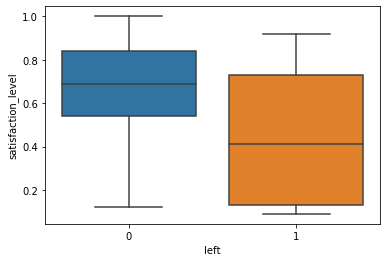

In [98]:
sns.boxplot(x='left',y='satisfaction_level',data=df)

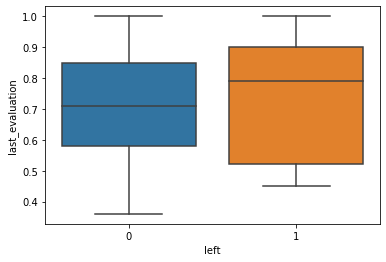

In [99]:
sns.boxplot(x='left',y='last_evaluation',data=df)

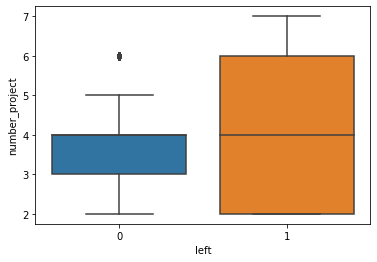

In [100]:
sns.boxplot(x='left',y='number_project',data=df)

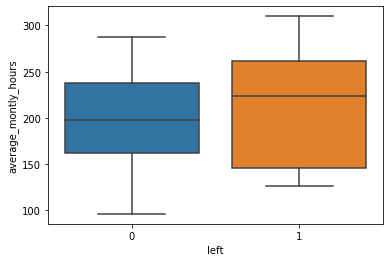

In [101]:
sns.boxplot(x='left',y='average_montly_hours',data=df)

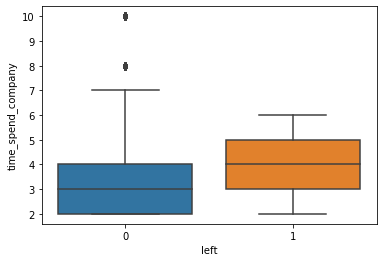

In [102]:
sns.boxplot(x='left',y='time_spend_company',data=df)

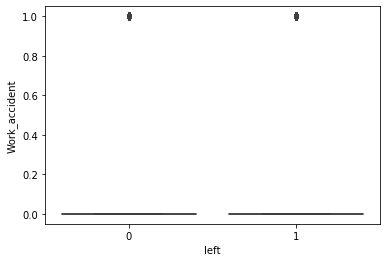

In [103]:
sns.boxplot(x='left',y='Work_accident',data=df)

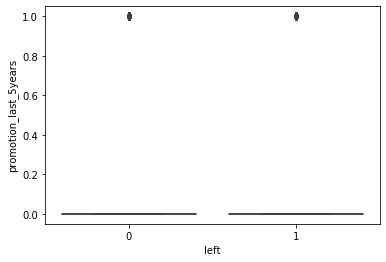

In [104]:
sns.boxplot(x='left',y='promotion_last_5years',data=df)

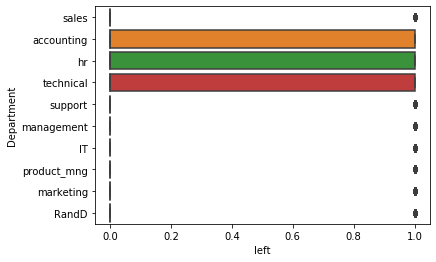

In [105]:
sns.boxplot(x='left',y='Department',data=df)

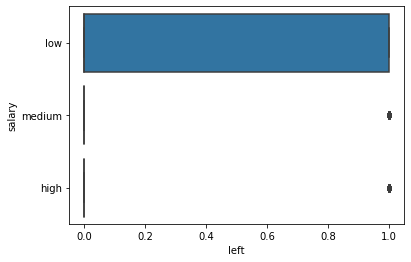

In [106]:
sns.boxplot(x='left',y='salary',data=df)

In [107]:
df = df[['satisfaction_level','number_project','time_spend_company','Department','salary','left']]
df

,satisfaction_level,number_project,time_spend_company,Department,salary,left
0,0.38,2,3,sales,low,1
1,0.80,5,6,sales,medium,1
2,0.11,7,4,sales,medium,1
3,0.72,5,5,sales,low,1
4,0.37,2,3,sales,low,1
...,...,...,...,...,...,...
14994,0.40,2,3,support,low,1
14995,0.37,2,3,support,low,1
14996,0.37,2,3,support,low,1
14997,0.11,6,4,support,low,1


In [108]:
dept_dummy = pd.get_dummies(df['Department'])
dept_dummy = dept_dummy.drop(['technical'],axis=1)
df = pd.concat([df,dept_dummy],axis=1)
df = df.drop(['Department'],axis=1)
df

,satisfaction_level,number_project,time_spend_company,salary,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,2,3,low,1,0,0,0,0,0,0,0,1,0
1,0.80,5,6,medium,1,0,0,0,0,0,0,0,1,0
2,0.11,7,4,medium,1,0,0,0,0,0,0,0,1,0
3,0.72,5,5,low,1,0,0,0,0,0,0,0,1,0
4,0.37,2,3,low,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,3,low,1,0,0,0,0,0,0,0,0,1
14995,0.37,2,3,low,1,0,0,0,0,0,0,0,0,1
14996,0.37,2,3,low,1,0,0,0,0,0,0,0,0,1
14997,0.11,6,4,low,1,0,0,0,0,0,0,0,0,1


In [109]:
salary_dummy = pd.get_dummies(df['salary'])
salary_dummy = salary_dummy.drop(['low'],axis=1)
df = pd.concat([df,salary_dummy],axis=1)
df = df.drop(['salary'],axis=1)
df

,satisfaction_level,number_project,time_spend_company,left,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,high,medium
0,0.38,2,3,1,0,0,0,0,0,0,0,1,0,0,0
1,0.80,5,6,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,7,4,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,5,5,1,0,0,0,0,0,0,0,1,0,0,0
4,0.37,2,3,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,2,3,1,0,0,0,0,0,0,0,0,1,0,0
14995,0.37,2,3,1,0,0,0,0,0,0,0,0,1,0,0
14996,0.37,2,3,1,0,0,0,0,0,0,0,0,1,0,0
14997,0.11,6,4,1,0,0,0,0,0,0,0,0,1,0,0


In [110]:
from sklearn.model_selection import train_test_split
X = df.drop(['left'],axis=1)
y = df['left']

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [112]:
log = linear_model.LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
log.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
log.score(X_test,y_test)

0.7806666666666666